In [37]:
# Import des bibliotheques

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 1. Preparation du dataset

In [38]:
# Chargement de la dataset

df = sns.load_dataset("iris")

In [39]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


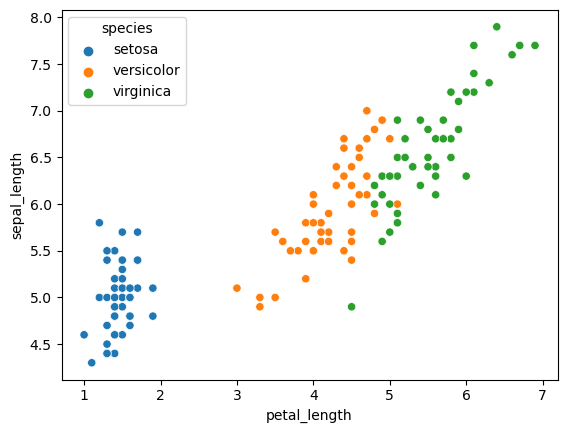

In [40]:
sns.scatterplot(data = df, x = df["petal_length"], y = df["sepal_length"], hue = "species")
plt.show()

In [41]:
X = np.vstack((df["petal_length"], df["sepal_length"])).T
y = np.array(df["species"]).reshape(len(df["species"]),1)
print(X.shape)
print(y.shape)

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

(150, 2)
(150, 1)


# Distance entre 2 points

In [42]:
def distance(a, b):
    ''' Distance euclidienne entre 2 points '''
    return np.sqrt(np.sum((a-b)**2))

# L'algorithme de KNN

In [43]:
def KNN_predict(X_train, y_train, X_test, k):
    predictions = []
    
    # Boucle parcourant les points a classifier
    for i in range(len(X_test[:,0])):
        point_dist = []
        
        for j in range(len(X_train[:,0])):
            distances = distance(X_train[j,:], X_test[i,:])
            point_dist.append(distances)
        point_dist = np.array(point_dist)
        
        # on va trie le vecteur distances par ordre croissant et on renvoie les indices des k plus proches voisins
        dist_idix = np.argsort(point_dist)[0:k]
        
        # On récupère les labels des k plus proches voisins
        labels = y_train[dist_idix]
        
        # On calcul le mode des labels des plus proches voisins
        lab = pd.DataFrame(labels).mode()
        predictions.append(lab[0])
    return np.array(predictions)

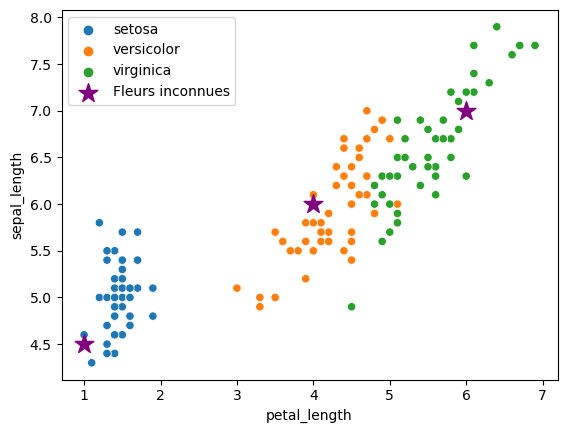

In [44]:
fleurs_inconnues = np.array([[1, 4.5], [4, 6], [6, 7]])
plt.figure()
sns.scatterplot(data = df, x = df["petal_length"], y = df["sepal_length"], hue = "species")
plt.scatter(fleurs_inconnues[:,0], fleurs_inconnues[:,1], label = "Fleurs inconnues", marker = "*", color = "purple", s=200)
plt.legend()
plt.show()

In [45]:
predict_fleurs_inconnues = KNN_predict(X_train, y_train, fleurs_inconnues, 5)
print(predict_fleurs_inconnues)

[['setosa']
 ['versicolor']
 ['virginica']]


Coefficient de dxétermination = 1.0


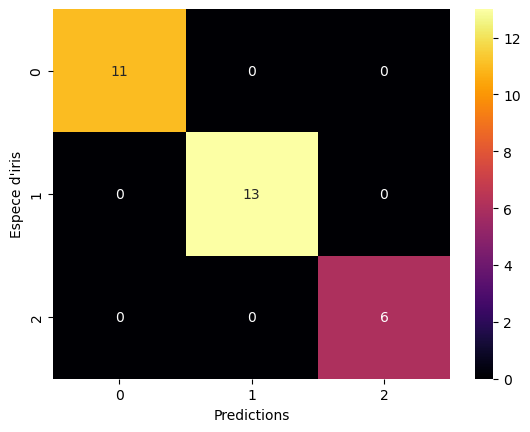

In [46]:
y_predictions = KNN_predict(X_train, y_train, X_test, 5)
print(f"Coefficient de dxétermination = {metrics.accuracy_score(y_test, y_predictions)}")

conf_matrix = metrics.confusion_matrix(y_test, y_predictions)
plt.figure()
sns.heatmap(conf_matrix, annot = True, cmap = "inferno")
plt.xlabel("Predictions")
plt.ylabel("Espece d'iris")
plt.show()

# L'algorithme des KNN avec Scikit-learn

In [49]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

print(f"Coef R2 = {KNN.score(X_test, y_test)}")

Coef R2 = 1.0


/home/jokos29/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
